# Vision industrielle - TP initiatiation au traitement d'image avec Python

L'objectif de ce TP est de découvrir et d'utiliser des outils de traitement d'images. Le langage de programmation Python sera utilisé, ainsi que les librairies scientifiques suivantes:

    - scikit-image
    - NumPy
    - SciPy
    - matplotlib
    
Ces différentes libairies font partie de la *stack* scientifique disponible pour python. D'autres librairies telles que OpenCV, scikit-learn, pandas vous seront présentées lors des TPs suivants.

## A la fin de ce TP vous devriez être capables

	- d'ouvrir une image à partir d'un fichier
	- d'extraire les contours d'une image en niveau de gris
	- d'effectuer des opérations de filtrage linéaire
	- d'effectuer des opérations morphologiques
	- de détecter la position d'un objet coloré



## Aide 
pour obtenir de l'aide sur une fonction : 
   
    - taper ?nom_fonction 
    - help(nom_fonction)
    
Voici une liste de ressources en ligne qui pourront vous être utiles au cours du TP:

 - IPython notebook introduction: http://opentechschool.github.io/python-data-intro/core/notebook.html
 - Numpy quickstart: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
 - Numpy pour le traitement d'image http://scikit-image.org/docs/dev/user_guide/numpy_images.html

 

### Exécuter la cellule suivante afin de charger l'ensemble des outils nécessaires

In [19]:
from functools import partial
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import imageio
import skimage.morphology
import skimage.segmentation
import skimage.feature
import skimage
%matplotlib notebook

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

def format_coord(x, y, image):
    x = int(x + 0.5)
    y = int(y + 0.5)
    try:
        val = str(image[y, x])
    except IndexError:
        val = "?"
    return "color={} @ [{}, {}]".format(val, y, x)

def display_image_nb(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.matshow(image, cmap=plt.gray())
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def display_image_color(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def draw_rectangle(y1, x1, y2, x2, color='red', ax=None):
    """ Add a rectangle on an image """
    if ax is None:
        ax = pyplot.gca()
    rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

print("OK let's go")

OK let's go


## 1. Introduction au tableau numpy pour le traitement d'image

Les images peuvent être représentées sous forme de tableaux multi-dimensionnels. Comme nous sommes en Python, nous utilisons la librairie NumPy (NumPy is the fundamental package for scientific computing with Python: http://www.numpy.org).

Une image en niveaux de gris correspond à un tableau à deux dimensions. Le code suivant permet de créer un tel tableau.

In [14]:
image_niveau_de_gris = np.array([[8, 9, 10, 11], [5, 3, 2, 1], [8, 9, 0, 0]])
print(image_niveau_de_gris)

[[ 8  9 10 11]
 [ 5  3  2  1]
 [ 8  9  0  0]]


<IPython.core.display.Javascript object>


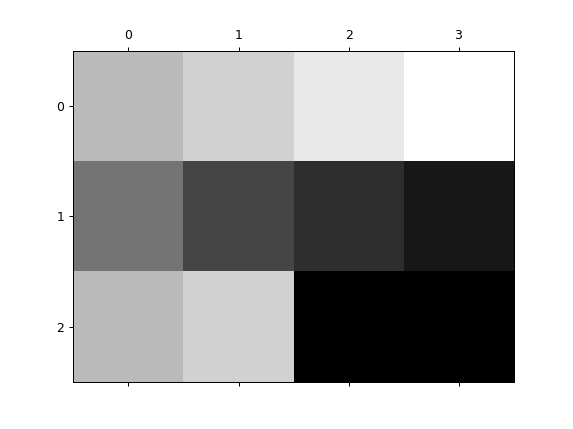

In [16]:
fig, ax = display_image_nb(image_niveau_de_gris)


<span style="color:red">Questions</span>

Quelle est valeur associée au pixel [0, 2]  (i.e ligne 0, colonne 2)




Vous pouvez accéder aux valeurs contenues dans l'image en utilisant la syntaxe suivante :

  image[ligne, colonne]

Compléter le code suivant pour acéder à la valeur associée au pixel de la ligne 0 et de la colonne 2

In [14]:
image_niveau_de_gris[]

SyntaxError: invalid syntax (<ipython-input-14-ccd71dfa6776>, line 1)

Pour représenter une image avec plusieurs canaux (par exemple une image RGB), on utilise une nouvelle dimension.

<IPython.core.display.Javascript object>


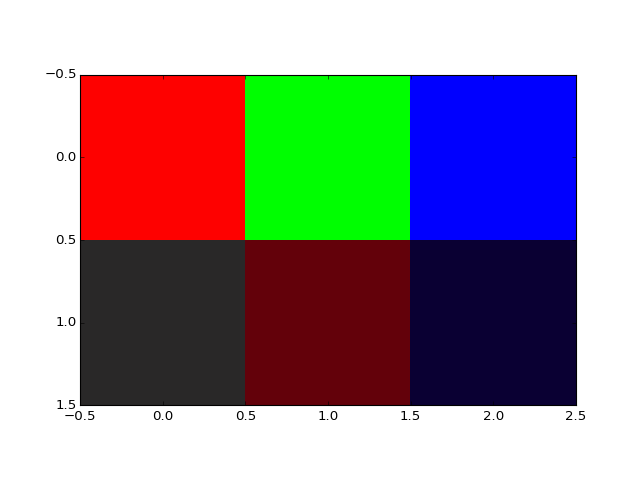

(<matplotlib.figure.Figure at 0x7f9cbc3147b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9cbc314ac8>)

In [15]:
image_rgb = [[[255, 0, 0], [0, 255, 0], [0, 0, 255]], [[40, 40, 40], [100, 0, 10], [10, 0, 50]]]
image_rgb = np.array(image_rgb, dtype=np.uint8)
display_image_color(image_rgb)

Pour sélectionner un canal vous pouvez utiliser la syntaxe suivante: 
    
    image[:, :, 0] qui selectionnera seulement le canal 0 (i.e Red pour une image RGB)
    image[:, :, 1] qui selectionnera le canal 1, etc..
    image[:, :, (0,1)] qui selectionnera le canal 0 et le canal 1
    
Pour remplacer la valeur d'un pixel vous pouvez utiliser la syntaxe suivante:

image[1,5,0] = 8  # qui remplacera le contenu du pixel [1,5] du canal 0 

Vous pouvez aussi remplacer tous les pixels d'un canal

image[:, :, 0] = 8


<span style="color:red">Questions</span>

Dans l'image *image_rgb* : enlever la composante rouge.

In [18]:
image_rgb[] =   # enlever le rouge..
display_image_color(image_rgb)


SyntaxError: invalid syntax (<ipython-input-18-8add99fc4288>, line 1)

C'est tout pour l'introduction sur les tableaux NumPy. N'hésitez pas à tester la construction de tableau et les opérations par vous-même, ainsi que les quelques fonctions de la cellule suivante.

plus d'info ici:
http://www.scipy-lectures.org/intro/numpy/array_object.html


In [65]:
# Test np.ones

# Test np.random.random

# what is the .shape of an array ?

# 2. Opérations sur les images:


Dans cette partie nous travaillerons avec l'image de référence *chelsea*. 

Vous pouvez néanmoins utiliser l'image que vous souhaitez. Pour charger une image depuis une URL vous pouvez utiliser la fonction imageio.imread.

    import imageio
    souris = imageio.imread('http://static.wamiz.fr/images/animaux/rongeurs/medium/souris.jpg')
    display_image_color(souris)

<IPython.core.display.Javascript object>


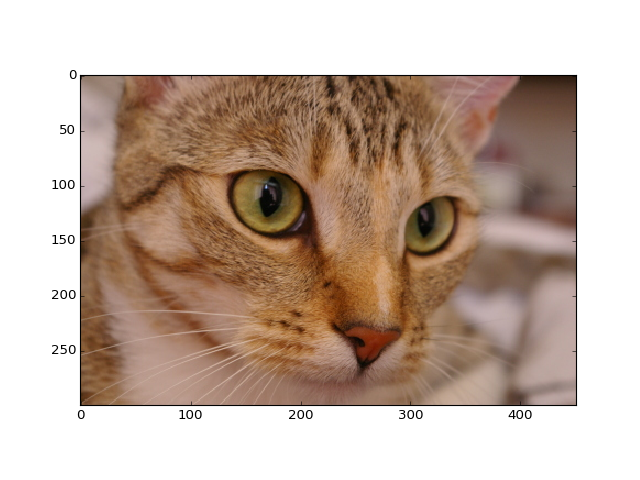

<IPython.core.display.Javascript object>


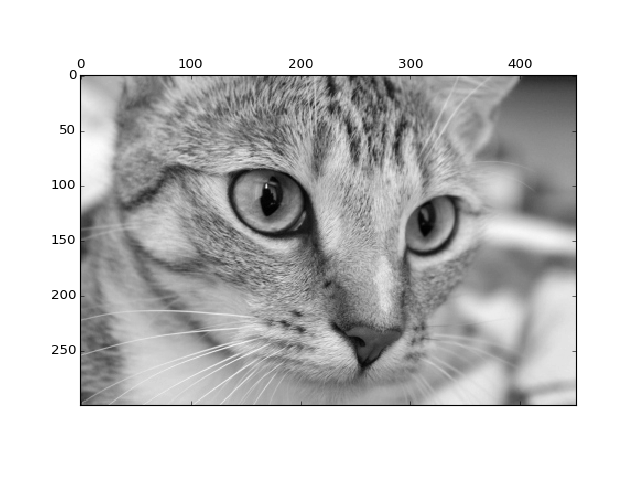

(<matplotlib.figure.Figure at 0x7efd58174a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd1665e048>)

In [6]:
from skimage.data import chelsea
%matplotlib notebook
image = chelsea()
image_nb = skimage.color.rgb2grey(image)
# ?chelsea
display_image_color(image)
display_image_nb(image_nb)
#import imageio
#souris = imageio.imread('http://static.wamiz.fr/images/animaux/rongeurs/medium/souris.jpg')
#display_image_color(souris)

## 2.1 Opérateurs pixels à pixels

- Donner la dimension de l'image
- Calculer la moyenne, max, min et somme de l'image
- Créer le mask binaire (i.e une image binaire) qui vaut 1 partout où l'image *image_nb* a une valeur <= 0.4
- Créer une nouvelle image *image_nb_thresholded* dans laquelle les pixels du masque sont mis à 0
- Afficher cette image
- Créer et afficher une nouvelle image dans laquelle les pixels de valeurs comprises entre 0.4 et 0.8 sont mis à zéros

Un peu plus compliqué:
- Créer un masque ne correspondant qu'à la partie basse de l'image
- L'utiliser pour calculer la moyenne, max, min, et somme
- Inverser la partie basse de l'image



Les fonctions qui peuvent vous être utiles sont: 

    display_image_nb, np.min, np.max, np.sum, np.mean, np.abs, np.shape, np.zeros, np.ones

## 2.2 Filtrage

Filtrer l'image *image_nb* avec les filtres suivants :

- un filtre moyenneur
- un filtre laplacien
- un filtre de Sobel
- utiliser un filtre de canny pour extraire les contours

Les fonctions qui peuvent vous être utiles sont:

    scipy.ndimage.convolve, skimage.filters.sobel, skimage.feature.canny

<IPython.core.display.Javascript object>


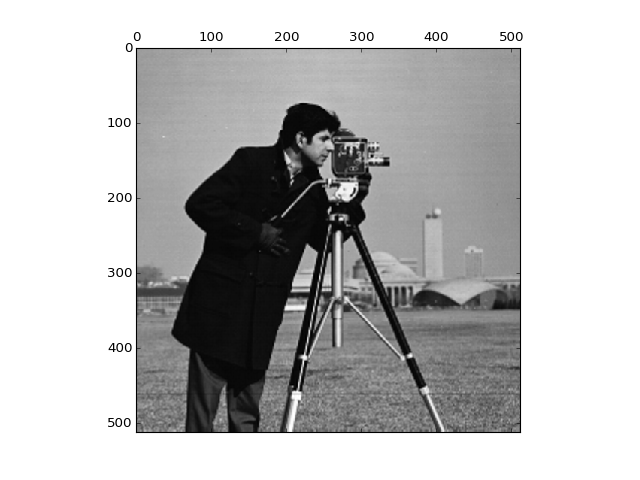

(<matplotlib.figure.Figure at 0x7efd0f653390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efd0f6495f8>)

In [15]:
image = skimage.data.camera()
image_nb = skimage.color.rgb2grey(image)
display_image_nb(image_nb)

## 2.3 Opérateurs morphologiques

À l'aide d'un élément structurant de type disk (3,3):


- Effectuer une dilatation (morphological dilation)
- Effecture une érosion (morphological erosion)
- Effectuer une opération de fermeture (morphological closing)
- Effecture une opération d'ouverture (morphological opening)

les fonctions qui peuvent vous être utiles:

    skimage.morphology.disk, skimage.morphology.opening, skimage.morphology.closing, skimage.morphology.dilate, skimage.morphology.erosion

## 3. Application

Le but de cette section est de mettre en application les différentes techniques que vous avez vu jusqu'à présent.

Objectif: détecter où se trouve le ballon dans l'image suivante

![alt text](http://srand.fr/red_ball.png "image to find")


Cette image est extraite du jeu de données disponible sur le site: http://www.iai.uni-bonn.de/~kleind/tracking/index.htm.
Nous aurons l'occasion de réutiliser ce type de jeu de données dans les prochains TPs.


Votre objectif

    - Trouver où se trouve la balle dans l'image
    
    
Un exemple de résultat: 


![alt text](http://srand.fr/red_ball_result.png "good result")

    
Voici une liste de fonction qui peut vous être utile:

     skimage.segmentation.mark_boundaries, skimage.color.rgb2lab, skimage.segmentation.clear_border, skimage.morphology.erosion, dilation, opening, closing, skimage.measure.label, skimage.measure.regionprops
     
     
C'est parti.




<IPython.core.display.Javascript object>


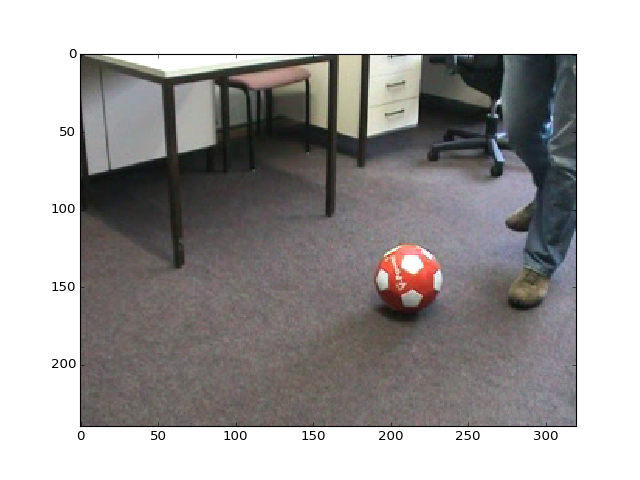

(<matplotlib.figure.Figure at 0x7fc248edda90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc248ece2e8>)

In [4]:
image = imageio.imread('http://srand.fr/red_ball.png')
display_image_color(image)

## Bonus:

- Calculer l'histogramme de l'image chelsea (skimage.data.chelsea())

ressources:

 - http://scikit-image.org/docs/dev/auto_examples/plot_windowed_histogram.html
 

## Bonus bis:

Charger l'image coins (skimage.data.coins())

- Afficher la pièce de la première colonne, dernière ligne.
- Calculer l'histogramme correspondant à cette pièce.
- Calculer l'histogramme normalisé correspondant à cette pièce, et l'afficher à l'aide d'un graphique.
